#  Lab 1



##  Hand-Written Digit Recognition

In [2]:
# Imports
import numpy as np
import pandas as df

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


<h1>Import Digits Data</h1>

In [3]:
from sklearn import datasets, metrics
from sklearn.datasets import load_digits
digits = load_digits()

<h1>See what they look like</h1>

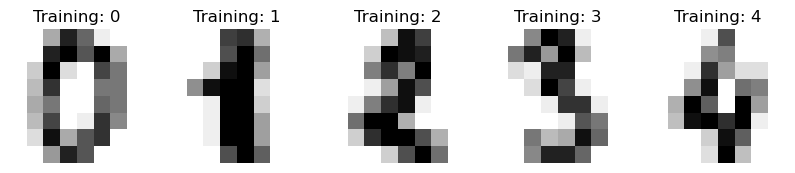

In [4]:
import matplotlib.pyplot as plt
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

<h1>Question 0</h1>

Split the digits.data and digits.target into train and test data. Create a dummy classifier for the digits data, with a strategy of "most_frequent", and print the score on test data. 

In [5]:
# Defining the X and Y based on the digits.data and digits.target.
X = digits.data

y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Creating a dummy classifier. Importing the dummy classifier. Using the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, y)


0.1018363939899833

<h1>Question 1</h1>
Create a logistic regression model for the digits data and print the score on test data. Use metrics.classification_report to give a more detailed report of results.

In [7]:
#Making a logistic regression model.
lr_clf = LogisticRegression(max_iter=10000)
lr_clf.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [8]:
print("Accuracy on training set: {:.3f}".format(lr_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr_clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.973


In [9]:
#For classification report
from sklearn.metrics import classification_report
lr_clf_pred = lr_clf.predict(X_test)
print(classification_report(y_test, lr_clf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.95      0.95      0.95        55
           2       0.96      1.00      0.98        52
           3       0.98      0.96      0.97        56
           4       1.00      0.98      0.99        64
           5       0.95      0.96      0.95        73
           6       0.98      0.98      0.98        57
           7       1.00      0.98      0.99        62
           8       0.93      0.96      0.94        52
           9       0.98      0.96      0.97        68

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594



<h1>Question 2</h1>
Create a 3-way split of the data, using train_test_split. First split into trainval and test, and then split trainval into train and val. 

In [10]:
# Got help from Chat GPT
# The validation data is used for evaluating the model so that the test set can be saved as a last test.
# splitting into trainval and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# splitting trainval into train and val sets
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

<h1>Question 3</h1>
Create a logistic regression classifier for the digits data. Write a loop that tries at least 4 values ranging from .001 to 1.0 for C. Use the val data to determine the best value. Then train on the combined train and val data, and score the resulting model on test. Use metrics.ConfusionMatrixDisplay.from_predictions to display a confusion matrix for all 10 classes. 

In [11]:
# Using GridSearchCV because I am familiar with this function
from sklearn.model_selection import GridSearchCV

# Using Grid search for trying different values of C, as it is asked for in the task
params = {'C': [0.001, 0.01, 0.1, 1]}

# Logistic regression model
lr_model = LogisticRegression(max_iter=10000)

# https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv
# Doing the Grid search with four different C values. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
lr_grid = GridSearchCV(estimator=lr_model,
                    param_grid=params,
                    cv=2, # We are not asked to use cross validation, there it is set to 1.
                    verbose=3) # Setting verbose on 3 to see the different results from the iterations

# Fitting the model
lr_grid.fit(X_train, y_train)

# Assessing the score and the parameters
lr_grid.best_score_, lr_grid.best_params_

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ...........................C=0.001;, score=0.955 total time=   0.0s
[CV 2/2] END ...........................C=0.001;, score=0.927 total time=   0.0s
[CV 1/2] END ............................C=0.01;, score=0.953 total time=   0.2s
[CV 2/2] END ............................C=0.01;, score=0.951 total time=   0.1s
[CV 1/2] END .............................C=0.1;, score=0.953 total time=   0.7s
[CV 2/2] END .............................C=0.1;, score=0.953 total time=   1.0s
[CV 1/2] END ...............................C=1;, score=0.951 total time=   0.4s
[CV 2/2] END ...............................C=1;, score=0.949 total time=   0.3s


(0.9530025753673685, {'C': 0.1})

In [12]:
# Determing the scores on the val data
lr_pred_grid = lr_grid.predict(X_test)

# Telling the amount of rows and columns
lr_pred_grid.shape, X_test.shape

((360,), (360, 64))

In [13]:
# Using the parameter from the Grid search to make a new model, and train on the Val data
lr_val = LogisticRegression(C=0.1, max_iter=10000)

# Fitting model on val data
lr_val.fit(X_trainval, y_trainval)

# Accuracy on val data
print("Accuracy on val set: {:.3f}".format(lr_val.score(X_val, y_val)))


Accuracy on val set: 1.000


In [14]:
# Doing some predictions
lr_val_pred = lr_val.predict(X_test)

#Checking accuracy
print("Accuracy on test set: {:.3f}".format(lr_val.score(X_test, y_test)))

Accuracy on test set: 0.972


In [14]:
#Importing for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Making a confusion matrix
cm_LR = confusion_matrix(y_test, lr_val_pred)
print(cm_LR)



[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


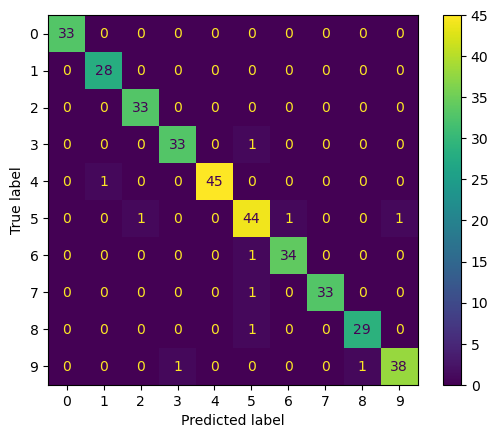

In [15]:
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR,
                               display_labels=lr_val.classes_)
disp.plot()
plt.show()

In [16]:
print(classification_report(y_test, lr_val_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



<h1>Question 4</h1>
Create a Decision Tree classifier for the digits data. Write a loop that tries values of 1 through 20 for maximum depth. Use the val data to determine the best value. 

In [17]:
# Creating a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
tree_basic = DecisionTreeClassifier(random_state = 42)

# Iterationg through differenc max depths with grid search. First defining params.
params_tree = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

# Doing the Grid search with four different C values. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
tree_grid = GridSearchCV(estimator=tree_basic,
                    param_grid=params_tree,
                    cv=2, # We are not asked to use cross validation, there it is set to 1.
                    verbose=3) # Setting verbose on 3 to see the different results from the iterations

# Fitting the model
tree_grid.fit(X_train, y_train)

# Displaying the best result
# Assessing the score and the parameters
tree_grid.best_score_, tree_grid.best_params_

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV 1/2] END .......................max_depth=1;, score=0.212 total time=   0.0s
[CV 2/2] END .......................max_depth=1;, score=0.209 total time=   0.0s
[CV 1/2] END .......................max_depth=2;, score=0.337 total time=   0.0s
[CV 2/2] END .......................max_depth=2;, score=0.333 total time=   0.0s
[CV 1/2] END .......................max_depth=3;, score=0.492 total time=   0.0s
[CV 2/2] END .......................max_depth=3;, score=0.474 total time=   0.0s
[CV 1/2] END .......................max_depth=4;, score=0.563 total time=   0.0s
[CV 2/2] END .......................max_depth=4;, score=0.556 total time=   0.0s
[CV 1/2] END .......................max_depth=5;, score=0.654 total time=   0.0s
[CV 2/2] END .......................max_depth=5;, score=0.646 total time=   0.0s
[CV 1/2] END .......................max_depth=6;, score=0.734 total time=   0.0s
[CV 2/2] END .......................max_depth=6;

(0.7963308589607636, {'max_depth': 9})

<h1>Question 5</h1>
Now train the best decision tree model on the combined train and val data, and score the resulting model on test.  
Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.


In [18]:
# Using the best params found before to fit a new model on the val data
tree_val = DecisionTreeClassifier(max_depth = 9, random_state = 42)

# Fitting the model
tree_val.fit(X_trainval, y_trainval)

# Checking the result
print("Accuracy on val set: {:.3f}".format(tree_val.score(X_trainval, y_trainval)))

Accuracy on val set: 0.948


In [19]:
# Doing some predictions
tree_val_pred = tree_val.predict(X_test)

# Looking on the result on the test data
print("Accuracy on test set: {:.3f}".format(tree_val.score(X_test, y_test)))

Accuracy on test set: 0.844


In [20]:
# Classification report
print(classification_report(y_test, tree_val_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.81      0.75      0.78        28
           2       0.92      0.70      0.79        33
           3       0.82      0.91      0.86        34
           4       0.77      0.89      0.83        46
           5       0.93      0.85      0.89        47
           6       0.97      0.91      0.94        35
           7       0.82      0.91      0.86        34
           8       0.81      0.73      0.77        30
           9       0.74      0.85      0.79        40

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360



In [21]:
# Confusion matrix
cm_tree = confusion_matrix(y_test, tree_val_pred)
print(cm_tree)

[[29  0  0  0  3  1  0  0  0  0]
 [ 0 21  1  0  2  0  0  1  1  2]
 [ 1  1 23  1  0  1  1  1  2  2]
 [ 0  0  0 31  0  0  0  0  2  1]
 [ 0  2  0  0 41  0  0  2  0  1]
 [ 0  0  1  1  1 40  0  0  0  4]
 [ 1  0  0  0  1  1 32  0  0  0]
 [ 0  0  0  1  1  0  0 31  0  1]
 [ 0  2  0  2  3  0  0  0 22  1]
 [ 0  0  0  2  1  0  0  3  0 34]]


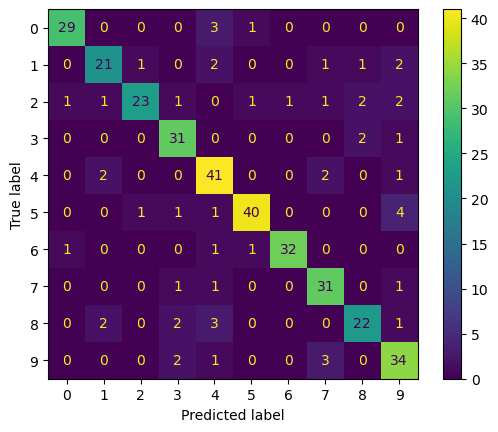

In [22]:
# Display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,
                               display_labels=tree_val.classes_)
disp.plot()
plt.show()

<h1>Question 6</h1>
Create a Random Forest classifier for the digits data. Use the val data to determine the best values for 
<ul>
    <li>number of estimators (from 50 to 500 by 50s)</li>
    <li>Max depth (from 10 to 50 by 10s)</li>
    </ul>
        

In [23]:
# Creating a random forest classifier. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Defining params to be investigated
rf_params = {'max_depth':[10,20,30,40,50], 'n_estimators':[50,100,150,200,250,300,350,400,450,500]}

# Making grid search
rf_grid = GridSearchCV(estimator=rf,
                    param_grid=rf_params,
                    cv=2, # We are not asked to use cross validation, there it is set to 1.
                    verbose=3) # Setting verbose on 3 to see the different results from the iterations

# Fitting the model on the val data instead of the normal train data
rf_grid.fit(X_trainval, y_trainval)

# Assessing the score and the parameters
rf_grid.best_score_, rf_grid.best_params_

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2] END .....max_depth=10, n_estimators=50;, score=0.949 total time=   0.0s
[CV 2/2] END .....max_depth=10, n_estimators=50;, score=0.964 total time=   0.0s
[CV 1/2] END ....max_depth=10, n_estimators=100;, score=0.950 total time=   0.1s
[CV 2/2] END ....max_depth=10, n_estimators=100;, score=0.971 total time=   0.1s
[CV 1/2] END ....max_depth=10, n_estimators=150;, score=0.954 total time=   0.2s
[CV 2/2] END ....max_depth=10, n_estimators=150;, score=0.971 total time=   0.2s
[CV 1/2] END ....max_depth=10, n_estimators=200;, score=0.955 total time=   0.3s
[CV 2/2] END ....max_depth=10, n_estimators=200;, score=0.971 total time=   0.3s
[CV 1/2] END ....max_depth=10, n_estimators=250;, score=0.953 total time=   0.4s
[CV 2/2] END ....max_depth=10, n_estimators=250;, score=0.971 total time=   0.4s
[CV 1/2] END ....max_depth=10, n_estimators=300;, score=0.951 total time=   0.5s
[CV 2/2] END ....max_depth=10, n_estimators=300

(0.9631238837599421, {'max_depth': 10, 'n_estimators': 450})

<h1>Question 7</h1>
Now train the best random forest model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

In [24]:
# using the parameters fund earlier in the "new" model
rf_train = RandomForestClassifier(max_depth=10, n_estimators=450, random_state=42)

# Fitting the model
rf_train.fit(X_train,y_train)

# Checking the results
print("Accuracy on train set: {:.3f}".format(rf_train.score(X_train, y_train)))

Accuracy on train set: 1.000


In [25]:
# Predicting
rf_pred = rf_train.predict(X_test)

# Classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360



In [26]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)
print(cm_rf)

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


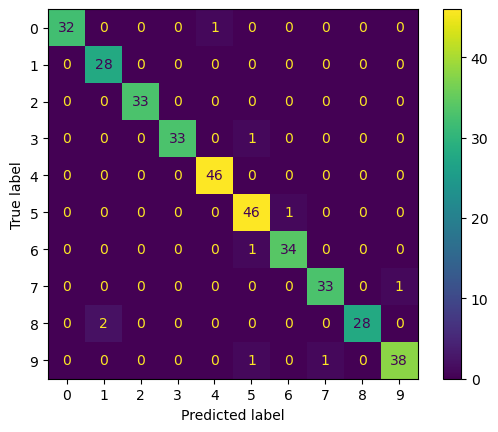

In [27]:
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                               display_labels=rf_train.classes_)
disp.plot()
plt.show()

# <h1>Question 8</h1>
Create a MLP classifier for the digits data. Use the val data to determine the best values for 
hidden layer sizes. Try values from (10,10) to (210,210), increasing by 50s. You can use two nested loops for variables H1 and H2, and then assign (H1,H2) to the parameter hidden_layer_sizes.
<p> Print the best values for the two hidden layer sizes</p>
    
        

In [28]:
# Importing MLP. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.neural_network import MLPClassifier

# Making a model/getting the model
MLP = MLPClassifier(random_state=42, max_iter=10000)

# Defining params to be investigated
MLP_params = {'hidden_layer_sizes':[(10,10),(60,60),(110,110),(160,160),(210,210)]}

# Making grid search
MLP_grid = GridSearchCV(estimator=MLP,
                    param_grid=MLP_params,
                    cv=2, # We are not asked to use cross validation, there it is set to 1.
                    verbose=3) # Setting verbose on 3 to see the different results from the iterations

# Fitting the model on the val data instead of the normal train data
MLP_grid.fit(X_trainval, y_trainval)

# Assessing the score and the parameters
MLP_grid.best_score_, MLP_grid.best_params_

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END .......hidden_layer_sizes=(10, 10);, score=0.922 total time=   1.0s
[CV 2/2] END .......hidden_layer_sizes=(10, 10);, score=0.905 total time=   0.9s
[CV 1/2] END .......hidden_layer_sizes=(60, 60);, score=0.933 total time=   0.4s
[CV 2/2] END .......hidden_layer_sizes=(60, 60);, score=0.955 total time=   0.4s
[CV 1/2] END .....hidden_layer_sizes=(110, 110);, score=0.944 total time=   0.5s
[CV 2/2] END .....hidden_layer_sizes=(110, 110);, score=0.962 total time=   0.6s
[CV 1/2] END .....hidden_layer_sizes=(160, 160);, score=0.961 total time=   0.6s
[CV 2/2] END .....hidden_layer_sizes=(160, 160);, score=0.960 total time=   0.6s
[CV 1/2] END .....hidden_layer_sizes=(210, 210);, score=0.961 total time=   0.9s
[CV 2/2] END .....hidden_layer_sizes=(210, 210);, score=0.965 total time=   0.8s


(0.9631190410698858, {'hidden_layer_sizes': (210, 210)})

<h1>Question 9</h1>

Now train the best mlp model on the combined train and val data, and score the resulting model on test.  

Use both metrics.classification_report and metrics.ConfusionMatrixDisplay.from_predictions to display the results in detail.

In [29]:
# using the parameters fund earlier in the "new" model
MLP_train = MLPClassifier(hidden_layer_sizes =(210,210) , random_state=42)

# Fitting the model
MLP_train.fit(X_train,y_train)

# Checking the results
print("Accuracy on train set: {:.3f}".format(MLP_train.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(MLP_train.score(X_test, y_test)))

Accuracy on train set: 1.000
Accuracy on test set: 0.981


In [30]:
# Predicting on test set
MLP_pred = MLP_train.predict(X_test)

# Classification report
print(classification_report(y_test, MLP_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.98      0.97        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [31]:
# Confusion matrix
cm_MLP = confusion_matrix(y_test, MLP_pred)
print(cm_MLP)

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


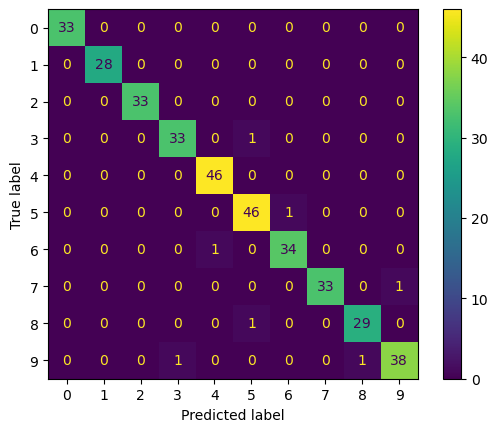

In [33]:
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_MLP,
                               display_labels=MLP_train.classes_)
disp.plot()
plt.show()